In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("top_anime_dataset_v2.csv")

#Fill missing values
for col in ["episodes"]:
    df[col] = df[col].fillna(0).astype(int)

for col in ["name", "english_name", "genres", "themes", "demographics",
            "type", "premiered", "producers", "studios", "source", "rating"]:
    df[col] = df[col].fillna("")

df["english_name"] = df["english_name"].replace("", None).fillna(df["name"])

In [15]:
#Terms for calculating similarity
df["combined_features"] = (
    df["genres"]
    + " " + df["themes"]
    + " " + df["demographics"]
    + " " + df["type"]
    + " " + df["episodes"].astype(str)
    + " " + df["premiered"]
    + " " + df["producers"]
    + " " + df["studios"]
    + " " + df["source"]
    + " " + df["rating"]
)

vectorizer = TfidfVectorizer(stop_words="english")
feature_matrix = vectorizer.fit_transform(df["combined_features"])

#Calculate cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)

In [16]:
#Find top 10 similar anime
def get_similar_anime(anime_name, df, similarity_matrix, top_n=10):
    #Could use both "english_name" and "name"
    anime_row = df[(df["name"] == anime_name) | (df["english_name"] == anime_name)]
    anime_index = anime_row.index[0]

    similarity_scores = list(enumerate(similarity_matrix[anime_index]))
    sorted_similar_anime = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n + 1]

    results = []
    for i, score in sorted_similar_anime:
        results.append((df.iloc[i]["english_name"], score))
    return results


In [ ]:
#Three query entities:
#Frieren: Beyond Journey's End
#Your Name.
#Dan Da Dan
query_anime = ["Frieren: Beyond Journey's End", "Your Name.", "Dan Da Dan"]

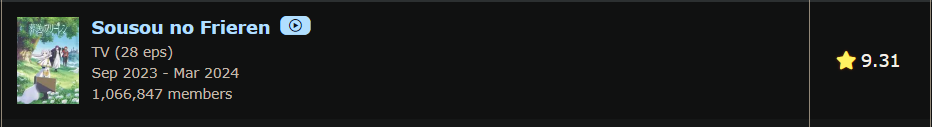

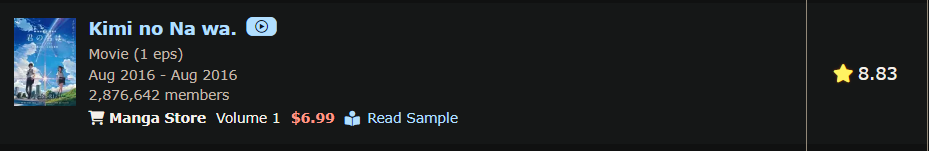

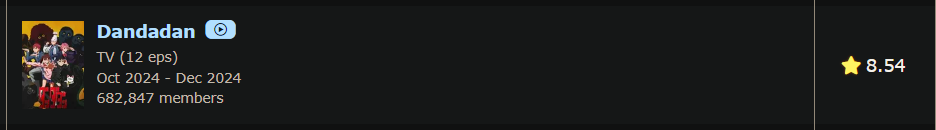

In [17]:
#Top 10 similar anime for each input
for anime in query_anime:
    print(f"\nTop 10 similar anime to '{anime}':")
    similar_anime = get_similar_anime(anime, df, similarity_matrix)

    if isinstance(similar_anime, str):
        print(similar_anime)
    else:
        for name, score in similar_anime:
            print(f"{name} (Similarity: {score:.4f})")


Top 10 similar anime to 'Frieren: Beyond Journey's End':
Detective Conan Movie 27 (Similarity: 0.6126)
Detective Conan Movie 26: Black Iron Submarine (Similarity: 0.6098)
Case Closed Movie 06: The Phantom of Baker Street (Similarity: 0.5385)
Detective Conan Movie 08: Magician of the Silver Sky (Similarity: 0.5359)
Puniru is a Kawaii Slime (Similarity: 0.5238)
Hunter x Hunter: Phantom Rouge (Similarity: 0.5229)
Case Closed Movie 23: The Fist of Blue Sapphire (Similarity: 0.5197)
The Apothecary Diaries (Similarity: 0.5040)
InuYasha the Movie 2: The Castle Beyond the Looking Glass (Similarity: 0.5039)
InuYasha the Movie: Affections Touching Across Time (Similarity: 0.5039)

Top 10 similar anime to 'Your Name.':
Weathering with You (Similarity: 0.7679)
Suzume (Similarity: 0.7061)
Fireworks (Similarity: 0.4709)
Flavors of Youth (Similarity: 0.4462)
Frieren: Beyond Journey's End Mini Anime (Similarity: 0.4419)
The Place Promised in Our Early Days (Similarity: 0.4342)
Scent of First Love (Si